我们想看看垃圾邮件和非垃圾邮件的特性是怎样的。

In [2]:
import dataloader
import params
import random
import numpy as np
import matplotlib.pyplot as plt
import importlib

In [3]:
args = params.get_default_args()
dl = dataloader.Dataloader(args)
hams = dl.get_ham()
spams = dl.get_spam()

Loaded 37822 data
Random seed: 1


In [4]:
def get_random_ham_content():
    ham = random.choice(hams)
    return dl[ham][0]

print(get_random_ham_content())

Received: from strange.qualcomm.com by diogenes (SMI-8.6/SMI-SVR4)
	id PAA22309; Wed, 7 Jan 1998 15:43:11 -0500
Received: from hgilkey (hgilkey.qualcomm.com [129.46.238.237]) by strange.qualcomm.com (8.8.5/1.4/8.7.2/1.14) with SMTP id MAA02513 for <westall@cs.clemson.edu>; Wed, 7 Jan 1998 12:42:59 -0800 (PST)
Message-Id: <3.0.3.32.19980107124130.009a0820@mail1.qualcomm.com>
X-Sender: hgilkey@mail1.qualcomm.com
X-Mailer: QUALCOMM Windows Eudora Pro Version 3.0.3 (32)
Date: Wed, 07 Jan 1998 12:41:30 -0800
To: westall@cs.clemson.edu
From: Harold Gilkey <hgilkey@qualcomm.com>
Subject: Yahoo! - Internet hit by "denial of service" attacks
Mime-Version: 1.0
Content-Type: text/plain; charset="iso-8859-1"
Content-Transfer-Encoding: quoted-printable
X-Mozilla-Status: 0001
Content-Length: 9549

Where's MARS when you need it! (-:

Also, did you ever get my e-mail with the ISBN number?  Our mail servers
have been acting kind of hokie lately - Speaking of Hokies (my undergrad),
I guess your Tarheels

In [24]:
def get_random_spam_content():
    spam = random.choice(spams)
    return dl[spam][0]

print(get_random_spam_content())

Received: from 192.168.0.2 (ip-213-177-135-32.dsl-static.scarlet.be [213.177.135.32])
	by aleve.media.mit.edu (8.9.3/8.9.1/+ALEVE) with ESMTP id OAA25061
	for <handyboard@media.mit.edu>; Fri, 14 Jan 2000 21:31:48 -0500 (EST)
Received: from 160.200.173.92 by ; Fri, 14 Jan 2000 23:32:43 +0100
Message-ID: <UTAKSFJNGFTSCIJWODUMQP@Cowan.ru>
From: "Blake Carlson" <Blake Carlson@es.co.nz>
Reply-To: "Blake Carlson" <ElenaRandolph@ukr.net>
To: handyboard@media.mit.edu
Subject: RE:.
Date: Fri, 14 Jan 2000 15:30:43 -0700
X-Mailer: Microsoft Outlook Express 6.00.2462.0000
MIME-Version: 1.0
Content-Type: multipart/alternative;
	boundary="--938633797716654203"
X-Priority: 5
X-MSMail-Priority: Low

----938633797716654203
Content-Type: text/html;
Content-Transfer-Encoding: 7Bit

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">
<html>
<head>
  <meta content="text/html; charset=windows-1251"
 http-equiv="Content-Type">
  <meta name="GENERATOR" content="MSHTML 6.00.2800.1081">
</head>
<body

In [5]:
meta_data = ['Subject', 'Content-Type', 'Received', 'From', 'To', 'Date']

In [6]:
def contain_meta_data(content, meta):
    cnt = 0
    for i in content.splitlines():
        if meta in i:
            cnt += 1
    return cnt

In [7]:
contain_meta_data(get_random_ham_content(), meta_data[0])

1

In [8]:
def statistic(idxs):
    freqs = np.zeros(len(meta_data))
    exists = np.zeros(len(meta_data))
    for idx, meta in enumerate(meta_data):
        for mail in idxs:
            cnt = contain_meta_data(dl[mail][0], meta)
            freqs[idx] += cnt
            if cnt:
                exists[idx] += 1
    exists = exists / len(dl)
    return freqs, exists


In [9]:
%matplotlib notebook
freqs, exists = statistic(dl.raw_idx)
ham_statics = statistic(dl.get_ham())
spam_statics = statistic(dl.get_spam())

In [10]:
fig, axs = plt.subplots(1, 2)
axs[0].scatter(meta_data, ham_statics[0])
axs[1].scatter(meta_data, spam_statics[0])
plt.show()
fig, axs = plt.subplots(1, 2)
axs[0].scatter(meta_data, ham_statics[1])
axs[1].scatter(meta_data, spam_statics[1])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# Testing tokenization
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/junetheriver/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
nltk.word_tokenize(get_random_ham_content())

['Received',
 ':',
 'from',
 'gatekeeper.maritz.com',
 '(',
 'firewall-user',
 '@',
 'gatekeeper.maritz.com',
 '[',
 '207.239.118.4',
 ']',
 ')',
 'by',
 'aleve.media.mit.edu',
 '(',
 '8.8.7/ML970927',
 ')',
 'with',
 'ESMTP',
 'id',
 'PAA03360',
 'for',
 '<',
 'handyboard',
 '@',
 'media.mit.edu',
 '>',
 ';',
 'Tue',
 ',',
 '17',
 'Nov',
 '1998',
 '15:07:41',
 '-0500',
 '(',
 'EST',
 ')',
 'Received',
 ':',
 'by',
 'gatekeeper.maritz.com',
 ';',
 'id',
 'OAA19408',
 ';',
 'Tue',
 ',',
 '17',
 'Nov',
 '1998',
 '14:05:08',
 '-0600',
 '(',
 'CST',
 ')',
 'Received',
 ':',
 'from',
 'mifenmta01.maritz.com',
 '(',
 '156.45.55.38',
 ')',
 'by',
 'gatekeeper.maritz.com',
 'via',
 'smap',
 '(',
 '4.1',
 ')',
 'id',
 'xma019232',
 ';',
 'Tue',
 ',',
 '17',
 'Nov',
 '98',
 '14:04:59',
 '-0600',
 'Received',
 ':',
 'by',
 'mifenmta01.maritz.com',
 'with',
 'Internet',
 'Mail',
 'Service',
 '(',
 '5.5.2232.9',
 ')',
 'id',
 '<',
 'XAX270HN',
 '>',
 ';',
 'Tue',
 ',',
 '17',
 'Nov',
 '1998',
 '14:

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

In [15]:
corpus = dl.raw_data.values()

In [16]:
X = vectorizer.fit_transform(corpus)
X

<37822x1504556 sparse matrix of type '<class 'numpy.int64'>'
	with 9550887 stored elements in Compressed Sparse Row format>

In [17]:
vectorizer.get_feature_names_out().shape

(1504556,)

In [18]:
print(vectorizer.vocabulary_.get('received'))

1112552


In [19]:
doc = get_random_spam_content()
print(doc)
print(vectorizer.build_preprocessor()(doc))
print(vectorizer.build_tokenizer()(doc))

Received: from mail.kurusyu-nai.com (61-30-232-142.static.tfn.net.tw [61.30.232.142])
	by aleve.media.mit.edu (8.8.7/ML970927) with ESMTP id BAA22138
	for <handyboard@media.mit.edu>; Tue, 1 Sep 1998 06:39:07 -0400 (EDT)
Received: (qmail 7156 invoked by uid 509); Tue, 1 Sep 1998 13:18:48 +0900
Date: Tue, 1 Sep 1998 13:18:48 +0900
Message-ID: <20060430041636.7155.qmail@mail.kurusyu-nai.com>
MIME-Version: 1.0
Content-Type: text/plain; charset=iso-2022-jp
Content-Transfer-Encoding: 7bit
From: info@kurusyu-nai.com
To: handyboard@media.mit.edu
Subject:$B%(%C%A2DG=$J!j$?$A$N%i%s%-%s%0$G$9!*(B
MIME-Version: 1.0
Content-type: text/plain; charset=iso-2022-jp
Content-Transfer-Encoding: 7bit
X-Mailer: WelcomeMail

$B"!!g!v!g!v!g!v!g!v!g!v!g!v!g!v!g!v!g!v!g!v!g!v!g!v!g!v!g!v!g"!(B
$B"(!!!!!!!!=U`%L!!z%+%N%8%gC5$7$O$d$C$Q$j%3%3$+$i!!!!!!!!!!!!"((B
$B"(!!!!%l%G%#!<%9;o!&#G#A#L;oB??t7G:\!*=w@-$KBg?M5$%5%$%H!*!!"((B
$B"!!g!v!g!v!g!v!g!v!g!v!g!v!g!v!g!v!g!v!g!v!g!v!g!v!g!v!g!v!g"!(B

$B!zWD!z

In [27]:
import model
importlib.reload(model)

<module 'model' from '/home/junetheriver/code/ml/bayes/model.py'>

In [28]:
nbc = model.NBC(dl, args)
nbc.train()

In [31]:
feature = nbc.feature_extraction([get_random_ham_content()])

In [32]:
feature.shape

(1, 1504468)

In [ ]:
from scipy import sparse
resparse = sparse.csr_matrix(feature)

In [ ]:
resparse

In [34]:
np.max(feature)

11.0

In [5]:
import dataloader
import params
import random
import numpy as np
import matplotlib.pyplot as plt
import importlib
import model

args = params.get_default_args()
dl = dataloader.Dataloader(args)
args.save_weight = '/home/junetheriver/code/ml/bayes/weight.pkl'

nbc = model.NBC(args)
train_dataset = dl[dl.get_train_fold(0)]
test_dataset = dl[dl.get_test_fold(0)]
nbc.train(train_dataset)

Loaded 37822 data
Random seed: 1
Generated a vectorizer of bow with 1000 vocabulary
Save model weight to:  /home/junetheriver/code/ml/bayes/weight.pkl


In [4]:
importlib.reload(params)
importlib.reload(model)

<module 'model' from '/home/junetheriver/code/ml/bayes/model.py'>

In [28]:
cnt = 0
for i in test_dataset:
    result = nbc.demo(i[0])
    if result == i[1] :
        cnt += 1
print(cnt / len(test_dataset))

0.7589899524061343


In [13]:
hams = dl.get_ham()
spams = dl.get_spam()

In [1]:
import numpy as np

In [4]:
a = np.array([1,2,3,4,5])
b = a * 3
c = np.average([a, b], axis = 0)
print(c)

[ 2.  4.  6.  8. 10.]


In [18]:
import match
importlib.reload(match)

<module 'match' from '/home/junetheriver/code/ml/bayes/match.py'>

In [23]:
for i in range(10):
    match.process(get_random_spam_content())

url: 12, email: 3, phone: 686
url: 4, email: 1, phone: 2234
url: 9, email: 5, phone: 1230
url: 9, email: 5, phone: 952
url: 8, email: 5, phone: 3771
url: 12, email: 5, phone: 1500
url: 16, email: 10, phone: 2676
url: 33, email: 3, phone: 8862
url: 8, email: 3, phone: 516
url: 17, email: 11, phone: 2355


In [22]:
for i in range(10):
    match.process(get_random_ham_content())

url: 12, email: 6, phone: 1282
url: 15, email: 5, phone: 1308
url: 10, email: 6, phone: 772
url: 15, email: 10, phone: 1842
url: 17, email: 4, phone: 1654
url: 11, email: 6, phone: 1094
url: 20, email: 8, phone: 4217
url: 10, email: 5, phone: 2662
url: 98, email: 0, phone: 8054
url: 10, email: 5, phone: 848


In [1]:
from wordcloud import WordCloud, STOPWORDS

In [5]:
text = get_random_ham_content()

In [6]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)

In [12]:
# Import package
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud():
    text = get_random_ham_content()
    wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")

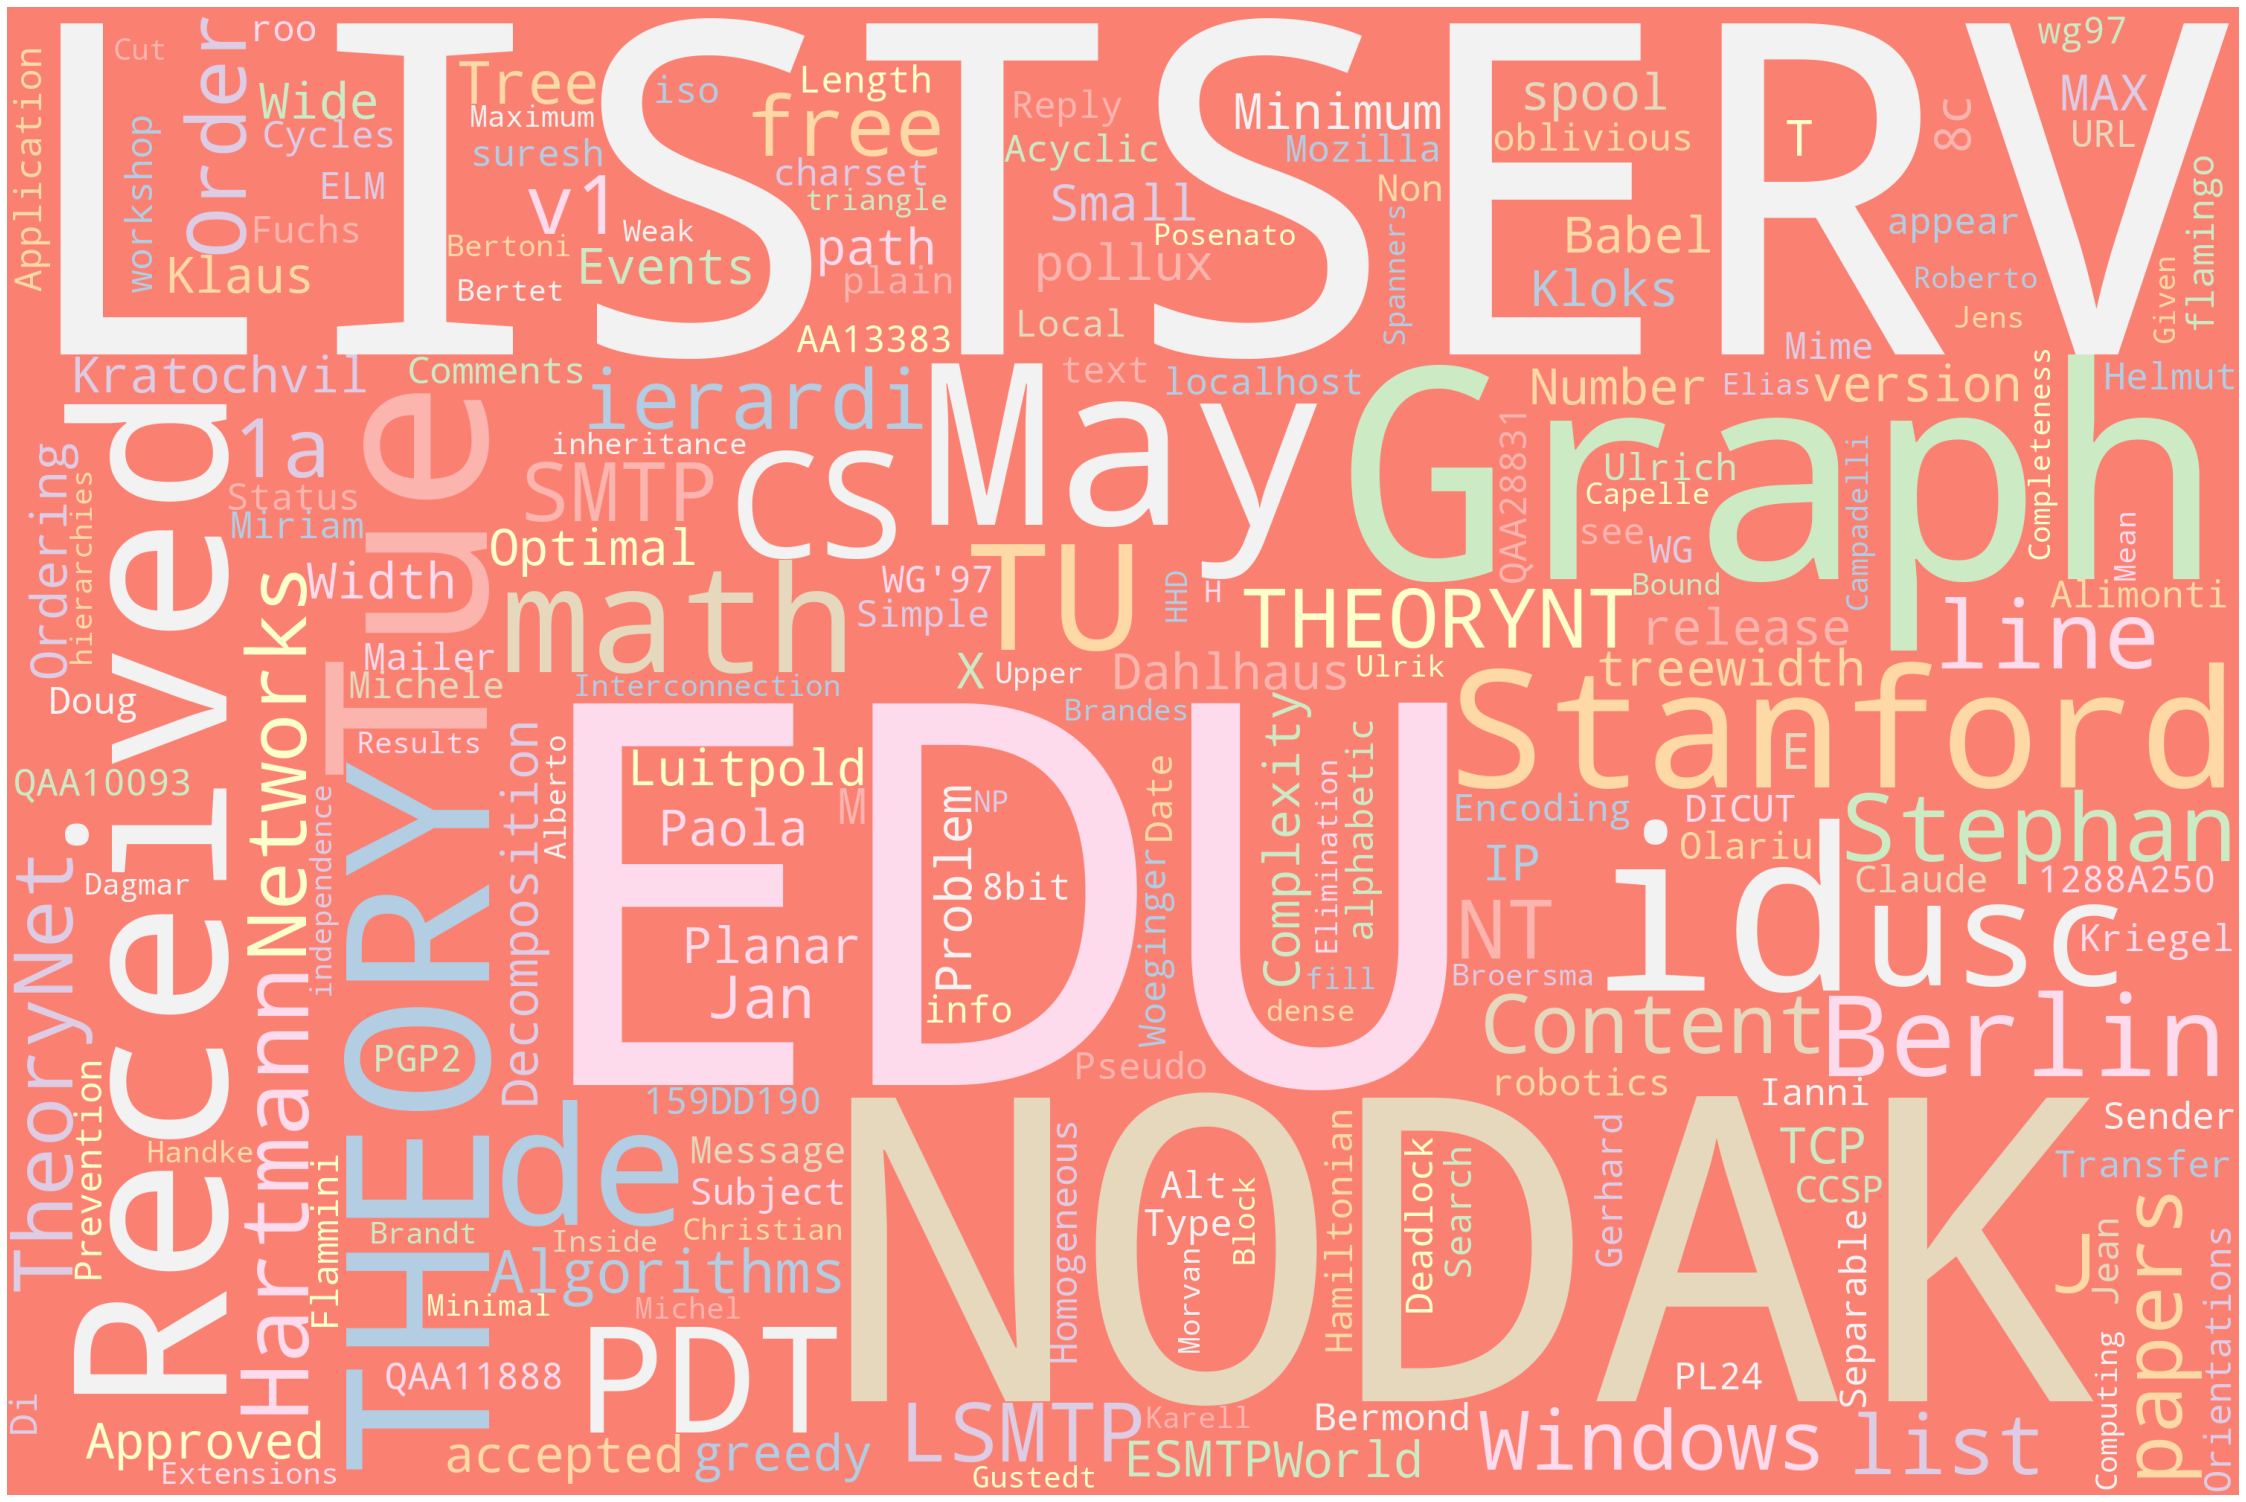

In [14]:
plot_cloud()